In [1]:
# prepare data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, json
import glob
import operator
from IPython.display import display, HTML

In [2]:
%load_ext autoreload
%autoreload 1

from shared_globals_functions import *
%aimport shared_globals_functions

In [3]:
cust_dir = 'test'
results_folder='results/final_results' # ar2 t1 vs t2.3.1

In [4]:
hdb_umap_labels_results = {}
umap_embedding = {}
umap_clusterable_embedding = {}

hdb_results = from_disk(f"{results_folder}/hdb_results")
hdb_results2 = from_disk(f"{results_folder}/hdb_results2") #quickfix
hdb_results = pd.concat([hdb_results,hdb_results2.loc[:]]).reset_index(drop=True) #quickfix
for testset in list(set(hdb_results['testset'].to_list())): 
    hdb_umap_labels_results[testset] = from_disk(f"{results_folder}/hdb_labels_results_{testset}")
    umap_embedding[testset] = from_disk(f"{results_folder}/umap_embedding_{testset}")
    umap_clusterable_embedding[testset] = from_disk(f"{results_folder}/umap_clusterable_embedding_{testset}")


reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/hdb_results.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/hdb_results2.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/hdb_labels_results_t2.5.1s+2.5.2+2.5.4+2.5.6+2.5.3.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/umap_embedding_t2.5.1s+2.5.2+2.5.4+2.5.6+2.5.3.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/umap_clusterable_embedding_t2.5.1s+2.5.2+2.5.4+2.5.6+2.5.3.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/hdb_labels_results_t2.3.6.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/umap_embedding_t2.3.6.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/umap_clusterable_embedding_t2.3.6.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_

reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/hdb_labels_results_t2.4.4.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/umap_embedding_t2.4.4.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/umap_clusterable_embedding_t2.4.4.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/hdb_labels_results_t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/umap_embedding_t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/umap_clusterable_embedding_t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/hdb_labels_results_t1.1.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/umap_embedding_t1.1.pkl
reading /home/manuel/d3tect-t

In [5]:
kmeans_umap_labels_results = {}
kmeansumap_results = from_disk(f"{results_folder}/kmeans-umap_results")
kmeansumap_results2 = from_disk(f"{results_folder}/kmeans-umap_results2") #quickfix
kmeansumap_results = pd.concat([kmeansumap_results,kmeansumap_results2.loc[:]]).reset_index(drop=True) #quickfix
for testset in list(set(kmeansumap_results['testset'].to_list())): 
    kmeans_umap_labels_results[testset] = from_disk(f"{results_folder}/kmeans-umap_labels_results_{testset}")


reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/kmeans-umap_results.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/kmeans-umap_results2.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/kmeans-umap_labels_results_t2.5.1s+2.5.2+2.5.4+2.5.6+2.5.3.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/kmeans-umap_labels_results_t2.3.6.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/kmeans-umap_labels_results_t2.3.1s+2.3.2.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/kmeans-umap_labels_results_t1+1.1+1.2+1.3+1.4.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/kmeans-umap_labels_results_t2.4.1s+2.4.4+2.4.2.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/kmeans-umap_labels_results_t2.3.6+2.3.5.pkl
read

In [6]:
kmeans_labels_results = {}
kmeans_results = from_disk(f"{results_folder}/kmeans_results")
kmeans_results2 = from_disk(f"{results_folder}/kmeans_results2") #quickfix
kmeans_results = pd.concat([kmeans_results,kmeans_results2.loc[:]]).reset_index(drop=True) #quickfix
for testset in list(set(kmeans_results['testset'].to_list())):
    kmeans_labels_results[testset] = from_disk(f"{results_folder}/kmeans_labels_results_{testset}")

reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/kmeans_results.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/kmeans_results2.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/kmeans_labels_results_t2.5.1s+2.5.2+2.5.4+2.5.6+2.5.3.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/kmeans_labels_results_t2.3.6.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/kmeans_labels_results_t2.3.1s+2.3.2.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/kmeans_labels_results_t1+1.1+1.2+1.3+1.4.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/kmeans_labels_results_t2.4.1s+2.4.4+2.4.2.pkl
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/kmeans_labels_results_t2.3.6+2.3.5.pkl
reading /home/manuel/d3tect-tools/Notebooks/

In [7]:
print(f"reading from disk {grtr}")
identified_repos = from_disk(grtr)

reading from disk identified_repos_v1
reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/identified_repos_v1.pkl


In [8]:
identified_repos

name      tag
0    0x4D31/awesome-threat-detection  secumon
1                    0xN3utr0n/Kanis  secumon
2                 airbnb/binaryalert  secumon
3                 airbnb/streamalert  secumon
4    ait-aecid/logdata-anomaly-miner  secumon
..                               ...      ...
115           arch3rPro/PentestTools  pentest
116               whiterabb17/sifter  pentest
117             hackThacker/advtools  pentest
118     rcallaby/Hacking-Study-Guide  pentest
119                 gotr00t0day/Gsec  pentest

[120 rows x 2 columns]

In [9]:
from collections import defaultdict

def max_fscore(d, dbg=False):
    # key: (my_cluster, kmeans_cluster)
    #d = {'a': (0, 0), 'b': (0, 1), 'c': (1, 1), 'd': (1, 3), 'e': (2, 2), 'f': (2, 2), 'g': (2, 0)}
    #d = {'a': (0, 10), 'b': (0, 10), 'c': (1, 11), 'd': (1, 11), 'e': (1, 12), 'f': (2, 13), 'g': (3, 13)}
    #d = {'a': (0, 100), 'b': (0, 100), 'c': (1, 101)}

    tag_list = defaultdict(set)
    for r in d.values():
        tag_list[r[0]].add(r[1])
        
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    # Double loop to compare each repo with every other repo
    already_processed = []
    for outer in d.keys():
        already_processed.append(outer)
        for inner in d.keys():
            if inner in already_processed:
                # Repos are not compared to themselves and each repo should only be compared with each other repo once (i.e. a->b then b->a is not necessary anymore)
                continue
            my_cluster_outer = d[outer][0]
            kmeans_outer = d[outer][1]
            my_cluster_inner = d[inner][0]
            kmeans_inner = d[inner][1]
            #kmeans_inner_list = tag_list[my_cluster_inner]
            if kmeans_outer == kmeans_inner: # in kmeans_inner_list: #kmeans_outer == kmeans_inner: # if inner clusterlabel == outer clusterlabel
                # outer and inner were clustered into the same cluster
                if my_cluster_outer == my_cluster_inner:
                    # outer and inner should be in the same cluster
                    tp += 1
                    if dbg: print(outer + '-' + inner + ': TP')
                else:
                    # outer and inner should be in different clusteres
                    fp += 1
                    if dbg: print(outer + '-' + inner + ': FP')
            else:
                # outer and inner were clustered into different clusters
                if my_cluster_outer == my_cluster_inner:
                    # outer and inner should be in the same cluster
                    fn += 1
                    if dbg: print(outer + '-' + inner + ': FN')
                else:
                    tn += 1
                    if dbg: print(outer + '-' + inner + ': TN')
    try:
        f1 = (2.0*tp) / (2.0*tp + fp + fn)
    except ZeroDivisionError as e:
        f1 = 'N/A'
    
    try:
        fpr = fp / (fp + tn)
        tnr = 1 - fpr # tn / (tn + fp)
    except ZeroDivisionError as e:
        try:
            tnr = tn / (tn + fp)
            fpr = 1 - tnr
        except ZeroDivisionError as e:
            tnr = 'N/A'
            fpr = 'N/A'
    

    try:
        tpr = tp / (tp + fn) #recall / hit rate
    except ZeroDivisionError as e:
        tpr = 'N/A'

    try:
        ppv = tp / (tp + fp) # precision
    except ZeroDivisionError as e:
        ppv = 'N/A'
        
    try:
        accuracy = (tp + tn) / (tp + tn + fp + fn)
    except ZeroDivisionError as e:
        accuracy = 'N/A'
        
    try:
        fnr = fn / (fn + tp) # miss
    except ZeroDivisionError as e:
        fnr = 'N/A'
    
    return { 'tp': tp,
            'tn': tn,
            'fp': fp,
            'fn': fn,
            'f1': f1,
            'accuracy': accuracy,
            'ppv': ppv,
            'fpr': fpr,
            'tpr': tpr,
            'tnr': tnr,
            'fnr': fnr
    }

In [10]:
hdb_results

type testset  version        name  hdb_minclust  hdb_minsamp   runtime  \
0     hdb  t2.4.2        1    ss50cs50            50           50  3.757748   
1     hdb  t2.4.2        1   ss100cs50            50          100  3.763902   
2     hdb  t2.4.2        1   ss150cs50            50          150  4.129426   
3     hdb  t2.4.2        1   ss200cs50            50          200  4.541437   
4     hdb  t2.4.2        1   ss250cs50            50          250  5.254001   
...   ...     ...      ...         ...           ...          ...       ...   
3478  hdb  t2.3.1        1  ss250cs450           450          250  7.542941   
3479  hdb  t2.3.1        1  ss300cs450           450          300  7.359307   
3480  hdb  t2.3.1        1  ss350cs450           450          350  7.923790   
3481  hdb  t2.3.1        1  ss400cs450           450          400  8.811841   
3482  hdb  t2.3.1        1  ss450cs450           450          450  9.175302   

                                                    tdf  \
0     rt_vect: 0.45777249336242676, min_df: 4, max_d...   
1     rt_vect: 0.45777249336242676, min_df: 4, max_d...   
2     rt_vect: 0.45777249336242676, min_df: 4, max_d...   
3     rt_vect: 0.45777249336242676, min_df: 4, max_d...   
4     rt_vect: 0.45777249336242676, min_df: 4, max_d...   
...                                                 ...   
3478  rt_vect: 13.948439836502075, min_df: 4, max_df...   
3479  rt_vect: 13.948439836502075, min_df: 4, max_df...   
3480  rt_vect: 13.948439836502075, min_df: 4, max_df...   
3481  rt_vect: 13.948439836502075, min_df: 4, max_df...   
3482  rt_vect: 13.948439836502075, min_df: 4, max_df...   

                                                   umap  
0     hellinger, rt_umap_tf: 295.400488615036, rt_um...  
1     hellinger, rt_umap_tf: 295.400488615036, rt_um...  
2     hellinger, rt_umap_tf: 295.400488615036, rt_um...  
3     hellinger, rt_umap_tf: 295.400488615036, rt_um...  
4     hellinger, rt_umap_tf: 295.400488615036, rt_um...  
...                                                 ...  
3478  hellinger, rt_umap_tf: 10967.266777515411, rt_...  
3479  hellinger, rt_umap_tf: 10967.266777515411, rt_...  
3480  hellinger, rt_umap_tf: 10967.266777515411, rt_...  
3481  hellinger, rt_umap_tf: 10967.266777515411, rt_...  
3482  hellinger, rt_umap_tf: 10967.266777515411, rt_...  

[3483 rows x 9 columns]

In [11]:
init_short = from_disk('init_short')

reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/init_short.pkl


In [12]:
def get_results(labels, remove_anomalies=True):
    results = []
    identified_repos_w_clabels = pd.merge(identified_repos, labels, on="name", how="left") # get all repos with labels
    total_repos = len(init_short)
    total_repos_gtr = len(identified_repos)

    cluster_sizes = labels.loc[:, labels.columns != 'name'].columns.to_list() # cluster sizes for testset
    for csize in cluster_sizes:
        #print(csize)
        ire_w_clabels = identified_repos_w_clabels[identified_repos_w_clabels[csize].notna()] # drop null (without labels)
        csize_anom = len(ire_w_clabels[ire_w_clabels[csize] == -1])
        csize_total_anom = len(labels[labels[csize] == -1])
        if remove_anomalies:
            ire_w_clabels = ire_w_clabels[ire_w_clabels[csize] != -1]
        gtr_labels = len(identified_repos_w_clabels[identified_repos_w_clabels[csize].notna()])
        total_labels = len(labels[labels[csize].notna()])
        stats = { 'cname': csize,
                  'csize':  len(labels[labels[csize] != -1].groupby(csize).size()), # cluster size
                  'no_lab': len(identified_repos_w_clabels[identified_repos_w_clabels[csize].isna()]), # repos without a label
                  'labeled_gtr_perc': (gtr_labels / total_repos_gtr)*100,
                  'labeled_total_perc': (total_labels / total_repos)*100,
                  'anomaly_gtr_perc': (csize_anom / (total_repos_gtr -(total_repos_gtr - gtr_labels)))*100 if csize_anom >0 else 0,
                  'anomaly_total_perc': (csize_total_anom / (total_repos -(total_repos - total_labels)))*100 if csize_total_anom >0 else 0,
                  'total_repos_in_ds': total_repos,
                  'total_repos_gtr': total_repos_gtr,
                  'anom': csize_anom, #anonalies in ground truth
                  'no_lab_repos': len(labels.index), #number of labeled repos in dataset
                  'tot_anom': csize_total_anom, #total anomalies in dataset
                }
        stats.update(max_fscore(ire_w_clabels[['tag', csize]].apply(tuple, axis=1).to_dict()))
        results.append(stats.copy())
    return results

def get_gtr_clabels(labels):
    return pd.merge(identified_repos, labels, on="name", how="left")

def get_full_results(results):
    None
    
get_full_results(hdb_results)
    
    
results = pd.DataFrame.from_dict(get_results(hdb_umap_labels_results['t1.2'])).sort_values('ppv')

In [13]:
with pd.option_context('display.max_rows', 150, 'display.max_columns', 40):
    display(results)

cname  csize  no_lab  labeled_gtr_perc  labeled_total_perc  \
80  ss450cs450      3      22         81.666667           31.450955   
35  ss450cs200      3      22         81.666667           31.450955   
62  ss450cs350      3      22         81.666667           31.450955   
17  ss450cs100      3      22         81.666667           31.450955   
8    ss450cs50      3      22         81.666667           31.450955   
26  ss450cs150      3      22         81.666667           31.450955   
44  ss450cs250      3      22         81.666667           31.450955   
71  ss450cs400      3      22         81.666667           31.450955   
53  ss450cs300      3      22         81.666667           31.450955   
42  ss350cs250      4      22         81.666667           31.450955   
41  ss300cs250      4      22         81.666667           31.450955   
48  ss200cs300      4      22         81.666667           31.450955   
49  ss250cs300      4      22         81.666667           31.450955   
79  ss400cs450      3      22         81.666667           31.450955   
50  ss300cs300      4      22         81.666667           31.450955   
51  ss350cs300      4      22         81.666667           31.450955   
52  ss400cs300      3      22         81.666667           31.450955   
39  ss200cs250      4      22         81.666667           31.450955   
43  ss400cs250      3      22         81.666667           31.450955   
58  ss250cs350      4      22         81.666667           31.450955   
59  ss300cs350      4      22         81.666667           31.450955   
60  ss350cs350      4      22         81.666667           31.450955   
61  ss400cs350      3      22         81.666667           31.450955   
66  ss200cs400      3      22         81.666667           31.450955   
67  ss250cs400      3      22         81.666667           31.450955   
68  ss300cs400      3      22         81.666667           31.450955   
69  ss350cs400      3      22         81.666667           31.450955   
70  ss400cs400      3      22         81.666667           31.450955   
75  ss200cs450      3      22         81.666667           31.450955   
76  ss250cs450      3      22         81.666667           31.450955   
77  ss300cs450      3      22         81.666667           31.450955   
78  ss350cs450      3      22         81.666667           31.450955   
57  ss200cs350      4      22         81.666667           31.450955   
34  ss400cs200      3      22         81.666667           31.450955   
40  ss250cs250      4      22         81.666667           31.450955   
32  ss300cs200      4      22         81.666667           31.450955   
7    ss400cs50      3      22         81.666667           31.450955   
12  ss200cs100      4      22         81.666667           31.450955   
13  ss250cs100      4      22         81.666667           31.450955   
14  ss300cs100      4      22         81.666667           31.450955   
15  ss350cs100      4      22         81.666667           31.450955   
16  ss400cs100      3      22         81.666667           31.450955   
33  ss350cs200      4      22         81.666667           31.450955   
6    ss350cs50      4      22         81.666667           31.450955   
3    ss200cs50      4      22         81.666667           31.450955   
21  ss200cs150      4      22         81.666667           31.450955   
22  ss250cs150      4      22         81.666667           31.450955   
23  ss300cs150      4      22         81.666667           31.450955   
4    ss250cs50      4      22         81.666667           31.450955   
31  ss250cs200      4      22         81.666667           31.450955   
24  ss350cs150      4      22         81.666667           31.450955   
30  ss200cs200      4      22         81.666667           31.450955   
5    ss300cs50      4      22         81.666667           31.450955   
25  ss400cs150      3      22         81.666667           31.450955   
27   ss50cs200      4      22         81.666667           31.450955   
36   ss50cs250      4      22    

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def draw_roc_mul(df):
    cluster_sizes = df['cname']
    tpr_values = df['tpr']
    fpr_values = df['fpr']
    roc_auc_values = []
    for i in range(len(cluster_sizes)):
        fpr = fpr_values[i]
        tpr = tpr_values[i]
        roc_auc = auc(fpr, tpr)
        roc_auc_values.append(roc_auc)
        
    plt.figure(figsize=(8, 6))

    for i in range(len(cluster_sizes)):
        plt.plot(fpr_values[i], tpr_values[i], lw=2, label=f'Cluster Size {cluster_sizes[i]} (AUC = {roc_auc_values[i]:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

def draw_roc(df):
    tpr = df['tpr']
    fpr = df['fpr']

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
def vis_clusters(df, _x='fpr', _y='tpr'):
    cluster_sizes = df['cname']
    y = df[_y]
    x = df[_x] #fpr
    # Plot the TPR and FPR points for each cluster size
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o-', lw=2, label='ROC Curve')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(_x)
    plt.ylabel(_y)
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


#draw_roc(res_df[res_df['csize']<30])

In [15]:
my_res = pd.DataFrame.from_dict(get_results(hdb_umap_labels_results['t2.3.1s+2.3.2+2.3.4+2.3.6'], remove_anomalies=True)) #2.3.1s
my_res[(my_res['anom']<80) & (my_res['csize']>10) ].sort_values('f1')

cname  csize  no_lab  labeled_gtr_perc  labeled_total_perc  \
9    ss50cs100    183       0             100.0           98.361948   
1    ss100cs50    186       0             100.0           98.361948   
10  ss100cs100    153       0             100.0           98.361948   
19  ss100cs150    129       0             100.0           98.361948   
45   ss50cs300     67       0             100.0           98.361948   
..         ...    ...     ...               ...                 ...   
67  ss250cs400     19       0             100.0           98.361948   
63   ss50cs400     26       0             100.0           98.361948   
76  ss250cs450     15       0             100.0           98.361948   
72   ss50cs450     17       0             100.0           98.361948   
54   ss50cs350     22       0             100.0           98.361948   

    anomaly_gtr_perc  anomaly_total_perc  total_repos_in_ds  total_repos_gtr  \
9          52.500000           48.192457             221971              120   
1          59.166667           48.083450             221971              120   
10         60.000000           48.043603             221971              120   
19         60.000000           48.201617             221971              120   
45         46.666667           31.552889             221971              120   
..               ...                 ...                ...              ...   
67          9.166667           14.551492             221971              120   
63          7.500000           13.619896             221971              120   
76          9.166667           12.077770             221971              120   
72          7.500000            9.235349             221971              120   
54          7.500000            8.509401             221971              120   

    anom  ...    tn   fp    fn        f1  accuracy       ppv       fpr  \
9     63  ...   489    6  1000  0.167219  0.369674  0.943925  0.012121   
1     71  ...   475    4   631  0.172099  0.460034  0.942857  0.008351   
10    72  ...   463    4   595  0.180575  0.468972  0.942857  0.008565   
19    72  ...   463    4   595  0.180575  0.468972  0.942857  0.008565   
45    56  ...   769   16  1087  0.207045  0.452877  0.900000  0.020382   
..   ...  ...   ...  ...   ...       ...       ...       ...       ...   
67    11  ...  1272  446   305  0.911407  0.872409  0.896496  0.259604   
63     9  ...  1298  456   313  0.913058  0.874038  0.898531  0.259977   
76    11  ...  1268  450   281  0.914051  0.875807  0.896242  0.261932   
72     9  ...  1294  460   289  0.915587  0.877314  0.898275  0.262258   
54     9  ...  1294  460   289  0.915587  0.877314  0.898275  0.262258   

         tpr       tnr       fnr  
9   0.091735  0.987879  0.908265  
1   0.094692  0.991649  0.905308  
10  0.099849  0.991435  0.900151  
19  0.099849  0.991435  0.900151  
45  0.116978  0.979618  0.883022  
..       ...       ...       ...  
67  0.926823  0.740396  0.073177  
63  0.928063  0.740023  0.071937  
76  0.932582  0.738068  0.067418  
72  0.933578  0.737742  0.066422  
54  0.933578  0.737742  0.066422  

[68 rows x 23 columns]

In [16]:
with pd.option_context('display.max_rows', 150, 'display.max_columns', 20):
    display(get_gtr_clabels(hdb_umap_labels_results['t2.3.1s'])[['name', 'tag', 'ss250cs250']])

name       tag  ss250cs250
0                      0x4D31/awesome-threat-detection   secumon          11
1                                      0xN3utr0n/Kanis   secumon          11
2                                   airbnb/binaryalert   secumon          11
3                                   airbnb/streamalert   secumon          11
4                      ait-aecid/logdata-anomaly-miner   secumon           7
5                                 ajaykumarkk/CyberDoc   secumon          11
6                                        arkime/arkime   secumon          11
7                   atc-project/atomic-threat-coverage   secumon          11
8                                  austin-taylor/flare   secumon          11
9                         BlueTeamLabs/sentinel-attack   secumon          11
10                                    bytedance/Elkeid   secumon          11
11                             certsocietegenerale/FIR   secumon          11
12                                           cisco/joy   secumon          11
13                                       cisco/mercury   secumon          11
14                                        CISOfy/lynis   secumon          11
15                                  clong/DetectionLab   secumon          11
16                                       cloudina/hawk   secumon          11
17                              ComodoSecurity/openedr   secumon          11
18                                   corelight/zeek2es   secumon          11
19                              crowdsecurity/crowdsec   secumon          11
20                        csirtgadgets/bearded-avenger   secumon          11
21                                 csirtgadgets/cif-v5   secumon          11
22                                    Cyb3rWard0g/HELK   secumon          11
23                               dogoncouch/logdissect   secumon          14
24                                   dogoncouch/LogESP   secumon          11
25                                    dreadl0ck/netcap   secumon          11
26                                         droe/xnumon   secumon          11
27                                    endgameinc/varna   secumon          11
28                               evilsocket/opensnitch   secumon          11
29                                   fail2ban/fail2ban   secumon          11
30                                       fleetdm/fleet   secumon          11
31                                gamelinux/passivedns   secumon          11
32                                          google/grr   secumon          11
33                                 google/stenographer   secumon          11
34                                        google/vxsig   secumon          11
35                            Graylog2/graylog2-server   secumon          11
36                hslatman/awesome-threat-intelligence   secumon          11
37                           InQuest/python-iocextract   secumon          11
38                                    InQuest/ThreatKB   secumon          11
39                            intelowlproject/IntelOwl   secumon          11
40                             ion-storm/sysmon-config   secumon          11
41                                ion-storm/sysmon-edr   secumon          11
42                                     ION28/BLUESPAWN   secumon          11
43                                       jmpsec/osctrl   secumon          11
44                               kismetwireless/kismet   secumon           7
45                                  marshyski/sshwatch   secumon          11
46                                   matanolabs/matano   secumon          11
47                             mattifestation/CimSweep   secumon          11
48                                 MHaggis/sysmon-dfir   secumon          11
49                                           MISP/MISP   secumon          11
50                                   mitre-attack/bzar   secumon          11
51                                         moz

In [17]:
with pd.option_context('display.max_rows', 150, 'display.max_columns', 20):
    display(get_gtr_clabels(hdb_umap_labels_results['t1'])[['name', 'tag', 'ss400cs400']])

name       tag  ss400cs400
0                      0x4D31/awesome-threat-detection   secumon         3.0
1                                      0xN3utr0n/Kanis   secumon         3.0
2                                   airbnb/binaryalert   secumon         3.0
3                                   airbnb/streamalert   secumon         3.0
4                      ait-aecid/logdata-anomaly-miner   secumon         3.0
5                                 ajaykumarkk/CyberDoc   secumon         3.0
6                                        arkime/arkime   secumon         3.0
7                   atc-project/atomic-threat-coverage   secumon         3.0
8                                  austin-taylor/flare   secumon         3.0
9                         BlueTeamLabs/sentinel-attack   secumon         3.0
10                                    bytedance/Elkeid   secumon         3.0
11                             certsocietegenerale/FIR   secumon         NaN
12                                           cisco/joy   secumon         NaN
13                                       cisco/mercury   secumon         3.0
14                                        CISOfy/lynis   secumon         3.0
15                                  clong/DetectionLab   secumon         3.0
16                                       cloudina/hawk   secumon         3.0
17                              ComodoSecurity/openedr   secumon         NaN
18                                   corelight/zeek2es   secumon         3.0
19                              crowdsecurity/crowdsec   secumon         3.0
20                        csirtgadgets/bearded-avenger   secumon         3.0
21                                 csirtgadgets/cif-v5   secumon         3.0
22                                    Cyb3rWard0g/HELK   secumon         3.0
23                               dogoncouch/logdissect   secumon         3.0
24                                   dogoncouch/LogESP   secumon         3.0
25                                    dreadl0ck/netcap   secumon         3.0
26                                         droe/xnumon   secumon         3.0
27                                    endgameinc/varna   secumon         NaN
28                               evilsocket/opensnitch   secumon         3.0
29                                   fail2ban/fail2ban   secumon         3.0
30                                       fleetdm/fleet   secumon         3.0
31                                gamelinux/passivedns   secumon         NaN
32                                          google/grr   secumon         NaN
33                                 google/stenographer   secumon         NaN
34                                        google/vxsig   secumon         3.0
35                            Graylog2/graylog2-server   secumon         3.0
36                hslatman/awesome-threat-intelligence   secumon         2.0
37                           InQuest/python-iocextract   secumon         3.0
38                                    InQuest/ThreatKB   secumon         3.0
39                            intelowlproject/IntelOwl   secumon         3.0
40                             ion-storm/sysmon-config   secumon         3.0
41                                ion-storm/sysmon-edr   secumon         3.0
42                                     ION28/BLUESPAWN   secumon         3.0
43                                       jmpsec/osctrl   secumon         3.0
44                               kismetwireless/kismet   secumon         3.0
45                                  marshyski/sshwatch   secumon         NaN
46                                   matanolabs/matano   secumon         3.0
47                             mattifestation/CimSweep   secumon         NaN
48                                 MHaggis/sysmon-dfir   secumon         3.0
49                                           MISP/MISP   secumon         3.0
50                                   mitre-attack/bzar   secumon         NaN
51                                         moz

In [18]:
with pd.option_context('display.max_rows', 150, 'display.max_columns', 20):
    display(get_gtr_clabels(hdb_umap_labels_results['t1']))

name       tag  ss50cs50  \
0                      0x4D31/awesome-threat-detection   secumon      -1.0   
1                                      0xN3utr0n/Kanis   secumon     137.0   
2                                   airbnb/binaryalert   secumon     105.0   
3                                   airbnb/streamalert   secumon     105.0   
4                      ait-aecid/logdata-anomaly-miner   secumon      49.0   
5                                 ajaykumarkk/CyberDoc   secumon     135.0   
6                                        arkime/arkime   secumon     144.0   
7                   atc-project/atomic-threat-coverage   secumon      -1.0   
8                                  austin-taylor/flare   secumon      -1.0   
9                         BlueTeamLabs/sentinel-attack   secumon      -1.0   
10                                    bytedance/Elkeid   secumon     141.0   
11                             certsocietegenerale/FIR   secumon       NaN   
12                                           cisco/joy   secumon       NaN   
13                                       cisco/mercury   secumon     144.0   
14                                        CISOfy/lynis   secumon      -1.0   
15                                  clong/DetectionLab   secumon      -1.0   
16                                       cloudina/hawk   secumon      -1.0   
17                              ComodoSecurity/openedr   secumon       NaN   
18                                   corelight/zeek2es   secumon       8.0   
19                              crowdsecurity/crowdsec   secumon      -1.0   
20                        csirtgadgets/bearded-avenger   secumon     139.0   
21                                 csirtgadgets/cif-v5   secumon     139.0   
22                                    Cyb3rWard0g/HELK   secumon     110.0   
23                               dogoncouch/logdissect   secumon      -1.0   
24                                   dogoncouch/LogESP   secumon      -1.0   
25                                    dreadl0ck/netcap   secumon      -1.0   
26                                         droe/xnumon   secumon      -1.0   
27                                    endgameinc/varna   secumon       NaN   
28                               evilsocket/opensnitch   secumon      -1.0   
29                                   fail2ban/fail2ban   secumon     144.0   
30                                       fleetdm/fleet   secumon      -1.0   
31                                gamelinux/passivedns   secumon       NaN   
32                                          google/grr   secumon       NaN   
33                                 google/stenographer   secumon       NaN   
34                                        google/vxsig   secumon      -1.0   
35                            Graylog2/graylog2-server   secumon     110.0   
36                hslatman/awesome-threat-intelligence   secumon       3.0   
37                           InQuest/python-iocextract   secumon     139.0   
38                                    InQuest/ThreatKB   secumon     137.0   
39                            intelowlproject/IntelOwl   secumon     139.0   
40                             ion-storm/sysmon-config   secumon      -1.0   
41                                ion-storm/sysmon-edr   secumon      -1.0   
42                                     ION28/BLUESPAWN   secumon      -1.0   
43                                       jmpsec/osctrl   secumon     140.0   
44                               kismetwireless/kismet   secumon      29.0   
45                                  marshyski/sshwatch   secumon       NaN   
46                                   matanolabs/matano   secumon      -1.0   
47                             mattifestation/CimSweep   secumon       NaN   
48                                 MHaggis/sysmon-dfir   secumon      -1.0   
49                                           MISP/MISP   secumon     139.0   
50                                   mitre-attack/bzar   secumon       N

In [19]:
my_res = pd.DataFrame.from_dict(get_results(hdb_umap_labels_results['t2.3.1s'], remove_anomalies=True))
my_res[(my_res['anom']<80) & (my_res['csize']>10) ].sort_values('f1')

cname  csize  no_lab  labeled_gtr_perc  labeled_total_perc  \
0     ss50cs50    275       0             100.0           98.361948   
2    ss150cs50    106       0             100.0           98.361948   
11  ss150cs100     99       0             100.0           98.361948   
1    ss100cs50    143       0             100.0           98.361948   
10  ss100cs100    124       0             100.0           98.361948   
18   ss50cs150    114       0             100.0           98.361948   
27   ss50cs200     96       0             100.0           98.361948   
9    ss50cs100    145       0             100.0           98.361948   
45   ss50cs300     74       0             100.0           98.361948   
54   ss50cs350     62       0             100.0           98.361948   
36   ss50cs250     81       0             100.0           98.361948   
72   ss50cs450     45       0             100.0           98.361948   
63   ss50cs400     47       0             100.0           98.361948   
29  ss150cs200     72       0             100.0           98.361948   
5    ss300cs50     66       0             100.0           98.361948   
20  ss150cs150     84       0             100.0           98.361948   
19  ss100cs150     91       0             100.0           98.361948   
28  ss100cs200     79       0             100.0           98.361948   
55  ss100cs350     47       0             100.0           98.361948   
46  ss100cs300     56       0             100.0           98.361948   
37  ss100cs250     66       0             100.0           98.361948   
73  ss100cs450     38       0             100.0           98.361948   
4    ss250cs50     76       0             100.0           98.361948   
13  ss250cs100     67       0             100.0           98.361948   
22  ss250cs150     66       0             100.0           98.361948   
64  ss100cs400     41       0             100.0           98.361948   
12  ss200cs100     74       0             100.0           98.361948   
30  ss200cs200     65       0             100.0           98.361948   
21  ss200cs150     69       0             100.0           98.361948   
3    ss200cs50     30       0             100.0           98.361948   
34  ss400cs200     11       0             100.0           98.361948   
14  ss300cs100     17       0             100.0           98.361948   
68  ss300cs400     11       0             100.0           98.361948   
16  ss400cs100     11       0             100.0           98.361948   
61  ss400cs350     11       0             100.0           98.361948   
43  ss400cs250     11       0             100.0           98.361948   
7    ss400cs50     12       0             100.0           98.361948   
25  ss400cs150     11       0             100.0           98.361948   
59  ss300cs350     13       0             100.0           98.361948   
50  ss300cs300     14       0             100.0           98.361948   
52  ss400cs300     11       0             100.0           98.361948   
78  ss350cs450     11       0             100.0           98.361948   
31  ss250cs200     18       0             100.0           98.361948   
57  ss200cs350     14       0             100.0           98.361948   
58  ss250cs350     13       0             100.0           98.361948   
47  ss150cs300     15       0             100.0           98.361948   
40  ss250cs250     17       0             100.0           98.361948   
39  ss200cs250     20       0             100.0           98.361948   
65  ss150cs400     13       0             100.0           98.361948   
66  ss200cs400     13       0             100.0           98.361948   
67  ss250cs400     11       0             100.0           98.361948   
38  ss150cs250     19       0             100.0           98.361948   
75  ss200cs450     11       0             100.0           98.361948   
74  ss150cs450     11       0             100.0           98.361948   
48  ss200cs300     15       0             100.0           98.361948   
56  ss150cs350     14       0    

In [ ]:
#kmeans-umapt
#kmeans
my_latex_result = pd.DataFrame()
ctypes = {
    "UMAP + HDB": hdb_umap_labels_results,
    "UMAP + K-Means": kmeans_umap_labels_results,
    "K-Means": kmeans_labels_results
}
skip_datasets = ['t2.3.1', 't2.4.1', 't2.5.1', 't1.3', 't1+1.1+1.2+1.3+1.4'] # we have s versions and 1.3.1

def get_results_latex(ctype, fn_ctype, my_latex_result, selected = False):
    datasets = sorted(fn_ctype.keys())
    if selected:
        datasets = list(t_set.keys())[::-1]

    #results = from_disk(f'results/autorun1/hdb_results')
    for i in datasets: #sorted(kmeans_labels_results.keys()):
        if i in skip_datasets:
            continue
        #if not i == 't2.4.2':
        #    continue
        ds = i
        if selected:
            ds = t_set[i]
        res_df = pd.DataFrame.from_dict(get_results(fn_ctype[ds])) #(results['testset']==t_set[i]) #tesset
        #display(res_df)
        res_df = res_df[res_df['tnr'] != 'N/A'] # remove N/A
        res_df = res_df[res_df['tpr'] != 'N/A'] # remove N/A
        #print(res_df)
        my_res_line = res_df[(res_df['csize']>2) &(res_df['tnr']>0.5)&(res_df['tpr']>0.5)].sort_values(['f1','csize'], ascending=False).head(1)
        my_res_line['Algorithm'] = ctype
        my_res_line['Dataset'] = i #testset
        #my_res_line['Anomalies/Disconnections'] = f"{my_res_line['tot_anom'].iat[0]} ({my_res_line['anom']})"
        my_latex_result = pd.concat([my_res_line,my_latex_result.loc[:]]).reset_index(drop=True)
        #print(my_latex_result)
    return my_latex_result

#                  'labeled_gtr_perc': total_repos_gtr / len(identified_repos_w_clabels[identified_repos_w_clabels[csize].notna()]),
#                  'labeled_total_perc': total_repos / len(labels[labels[csize].notna()]),
#                  'anomaly_gtr_perc': total_repos_gtr / csize_anom,
#                  'anomaly_total_perc': total_repos / len(labels[labels[csize] == -1]),
#                  'total_repos_in_ds': total_repos,
#                  'total_repos_gtr': total_repos_gtr,

for ctype, fn_ctype in ctypes.items():
    results = get_results_latex(ctype, fn_ctype, my_res_line)
    my_res_line = pd.concat([results,my_res_line.loc[:]]).reset_index(drop=True)
    
    #'D_T1': 't1',
    #'D_T2': 't1.1',
    #'D_T3': 't1.2',
    #'D_T4': 't1.3.1',
    #'D_T5': 't1.3',
    #'D_T6': 't1.4',
    #'D_C1': 't2.5.1s+2.5.2+2.5.4+2.5.6+2.5.3',
    #'D_C2': 't2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3',
    #'D_C3': 't2.4.1s+2.4.2+2.4.4+2.4.6+2.4.3',
    
            #('t2.5.2', ''), #about
            #('t2.5.3', ''), #tree
            #('t2.5.5', ''), #languages
            #('t2.5.6', ''), #name
            #('t2.5.4', ''), #topics
            #2.5.1. readme
def replace_ds_readme(ds):
    #ds_list = ds.split('+')
    if re.match(r"(.*)2.[3-5].1(.*)", ds):
        return 'x'
    return ''
def replace_ds_about(ds):
    if re.match(r"(.*)2.[3-5].2(.*)", ds):
        return 'x'
    return ''
def replace_ds_tree(ds):
    if re.match(r"(.*)2.[3-5].3(.*)", ds):
        return 'x'
    return ''
def replace_ds_languages(ds):
    if re.match(r"(.*)2.[3-5].5(.*)", ds):
        return 'x'
    return ''
def replace_ds_name(ds):
    if re.match(r"(.*)2.[3-5].6(.*)", ds):
        return 'x'
    return ''
def replace_ds_topic(ds):
    if re.match(r"(.*)2.[3-5].4(.*)", ds):
        return 'x'
    if re.match(r"^t1.[1-4]$", ds):
        return 'x'
    if re.match(r"^t1$", ds):
        return 'x'
    if re.match(r"^t1.3.1$", ds):
        return 'x'
    return ''

def ds_keywords(ds):
    ds_list = ds.split('+')
    if 't1' in ds_list:
        return 'D_T1'
    if 't1.1' in ds_list:
        return 'D_T2'
    if 't1.2' in ds_list:
        return 'D_T3'
    if 't1.3.1' in ds_list:
        return 'D_T4'
    if 't1.3' in ds_list:
        return 'D_T5'
    if 't1.4' in ds_list:
        return 'D_T6'
    if any('2.5' in s for s in ds_list):
        return 'D_C1'
    if any('2.3' in s for s in ds_list):
        return 'D_C2'
    if any('2.4' in s for s in ds_list):
        return 'D_C3'

#print(my_latex_result)

my_latex_result = my_res_line[['Algorithm', 'Dataset', 'f1', 'ppv', 'tpr', 'csize', 'labeled_gtr_perc', 'labeled_total_perc', 'anomaly_gtr_perc', 'anomaly_total_perc' ]].copy() #'no_lab', 'tot_anom', 'anom']]
        
my_latex_result['T'] = my_latex_result['Dataset'].apply(lambda x: replace_ds_topic(x)) #topic
my_latex_result['A'] = my_latex_result['Dataset'].apply(lambda x: replace_ds_about(x)) #about
my_latex_result['R'] = my_latex_result['Dataset'].apply(lambda x: replace_ds_readme(x)) #readme
my_latex_result['N'] = my_latex_result['Dataset'].apply(lambda x: replace_ds_name(x)) #names
my_latex_result['D'] = my_latex_result['Dataset'].apply(lambda x: replace_ds_tree(x)) #directories
my_latex_result['L'] = my_latex_result['Dataset'].apply(lambda x: replace_ds_languages(x)) #languages
my_latex_result['Keywords'] = my_latex_result['Dataset'].apply(lambda x: ds_keywords(x))
my_latex_result = my_latex_result.rename(columns={
    "f1": "F1", 
    "ppv": "PPV", 
    "tpr": "TPR", 
    "csize": "Clusters", 
    "labeled_gtr_perc": "L. GT in %",
    "labeled_total_perc": "L. Total in %",
    "anomaly_gtr_perc": "A. GT in %",
    "anomaly_total_perc": "A. Total in %",
    "no_lab": "Not labeled", 
    "tot_anom": "T A.", 
    "anom": "A."})




In [23]:
with pd.option_context('display.max_rows', 3500, 'display.max_columns', 40, 'display.max_colwidth', None):
    display(hdb_results)

type                          testset  version        name  hdb_minclust  \
0     hdb                           t2.4.2        1    ss50cs50            50   
1     hdb                           t2.4.2        1   ss100cs50            50   
2     hdb                           t2.4.2        1   ss150cs50            50   
3     hdb                           t2.4.2        1   ss200cs50            50   
4     hdb                           t2.4.2        1   ss250cs50            50   
5     hdb                           t2.4.2        1   ss300cs50            50   
6     hdb                           t2.4.2        1   ss350cs50            50   
7     hdb                           t2.4.2        1   ss400cs50            50   
8     hdb                           t2.4.2        1   ss450cs50            50   
9     hdb                           t2.4.2        1   ss50cs100           100   
10    hdb                           t2.4.2        1  ss100cs100           100   
11    hdb                           t2.4.2        1  ss150cs100           100   
12    hdb                           t2.4.2        1  ss200cs100           100   
13    hdb                           t2.4.2        1  ss250cs100           100   
14    hdb                           t2.4.2        1  ss300cs100           100   
15    hdb                           t2.4.2        1  ss350cs100           100   
16    hdb                           t2.4.2        1  ss400cs100           100   
17    hdb                           t2.4.2        1  ss450cs100           100   
18    hdb                           t2.4.2        1   ss50cs150           150   
19    hdb                           t2.4.2        1  ss100cs150           150   
20    hdb                           t2.4.2        1  ss150cs150           150   
21    hdb                           t2.4.2        1  ss200cs150           150   
22    hdb                           t2.4.2        1  ss250cs150           150   
23    hdb                           t2.4.2        1  ss300cs150           150   
24    hdb                           t2.4.2        1  ss350cs150           150   
25    hdb                           t2.4.2        1  ss400cs150           150   
26    hdb                           t2.4.2        1  ss450cs150           150   
27    hdb                           t2.4.2        1   ss50cs200           200   
28    hdb                           t2.4.2        1  ss100cs200           200   
29    hdb                           t2.4.2        1  ss150cs200           200   
30    hdb                           t2.4.2        1  ss200cs200           200   
31    hdb                           t2.4.2        1  ss250cs200           200   
32    hdb                           t2.4.2        1  ss300cs200           200   
33    hdb                           t2.4.2        1  ss350cs200           200   
34    hdb                           t2.4.2        1  ss400cs200           200   
35    hdb                           t2.4.2        1  ss450cs200           200   
36    hdb                           t2.4.2        1   ss50cs250           250   
37    hdb                           t2.4.2        1  ss100cs250           250   
38    hdb                           t2.4.2        1  ss150cs250           250   
39    hdb                           t2.4.2        1  ss200cs250           250   
40    hdb                           t2.4.2        1  ss250cs250           250   
41    hdb                           t2.4.2        1  ss300cs250           250   
42    hdb                           t2.4.2        1  ss350cs250           250   
43    hdb                           t2.4.2        1  ss400cs250           250   
44    hdb                           t2.4.2        1  ss450cs250           250   
45    hdb                           t2.4.2        1   ss50cs300           300   
46    hdb                           t2.4.2        1  ss100cs300           300   
47    hdb                           t2.4.2        1  ss150cs300           300   
48    hdb                           

In [ ]:
with pd.option_context('display.max_rows', 1000, 'display.max_columns', 40, 'display.max_colwidth', None):
    display(kmeansumap_results)

In [ ]:
with pd.option_context('display.max_rows', 1000, 'display.max_columns', 40, 'display.max_colwidth', None):
    display(kmeans_results)

In [ ]:
with pd.option_context('display.max_rows', 500, 'display.max_columns', 40, 'display.max_colwidth', None):
    display(my_res_line.drop_duplicates().sort_values('f1'))

In [ ]:
#my_latex_result
#pr_latex

#pd.merge(identified_repos, testset[["name", "clabel", "topics"]], on="name", how="left")

In [ ]:
my_latex_result.drop_duplicates().reset_index()

In [ ]:
pr_latex = my_latex_result.sort_values(['F1','Clusters']).iloc[:, [0,10,11,12,13,14,15,5,16,2,3,4,7,6,9,8]].iloc[::-1]

In [ ]:
pr_latex = pr_latex.drop_duplicates()
pr_latex = pr_latex.astype({'F1':'float','TPR':'float','PPV':float})

pr_latex = pr_latex.round(2)

In [ ]:
pr_latex.sort_values(['F1','PPV','TPR','Clusters']).iloc[::-1]

In [ ]:
print(pr_latex.to_latex(index=False, #.sort_values(['Dataset', 'Algorithm'],ascending=True)
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,
))

#cm = sns.light_palette("green", as_cmap=True)
#  .background_gradient(cmap=cm, subset=['total_amt_usd_diff','total_amt_usd_pct_diff'])
#  .highlight_max(subset=['total_amt_usd_diff','total_amt_usd_pct_diff'])

# ----

In [ ]:
testset = t_set_loader('D_C3')
t_name

In [ ]:
get_similarity(testset, 'snort3/snort3', "pwndizzle/CodeExecutionOnWindows")

# ----

In [497]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/final_results/umap_embedding_t2.3.1s.pkl
clabel
-1      17850
 0        226
 1        433
 2        114
 3        408
 4        519
 5        582
 6       1308
 7       3154
 8        719
 9        175
 10     64836
 11      2367
 12      1390
 13    120964
 14       327
 15      2002
 16       727
 17       234
dtype: int64
cluster size 19
there are 100 secumon
there are 10 imageocr
there are 10 imageocr


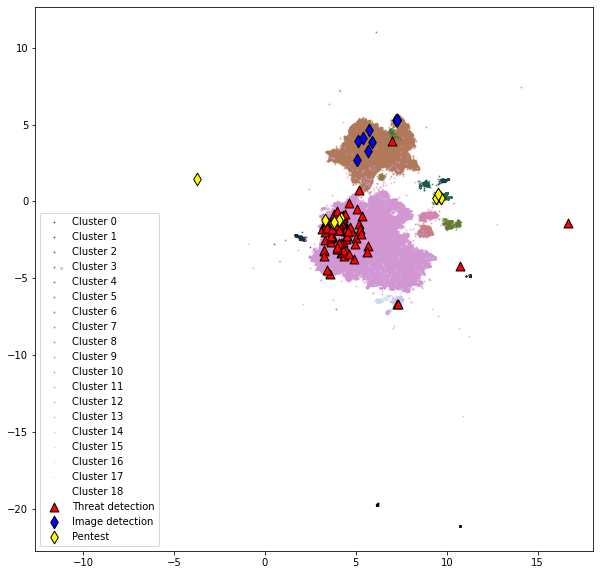

In [371]:
def plot_cluster(cluster_df, plot_anom=False, size=(10, 10)):
    clst_size = len(cluster_df[['clabel']].groupby('clabel').size())
    print(f"cluster size {clst_size}")
    colors = plt.cm.get_cmap('cubehelix')
    fig, ax = plt.subplots(figsize=size)

    min_range=0
    if plot_anom:
        min_range=-1
    for i in range (min_range, clst_size):
        x_points = cluster_df[cluster_df['clabel'] == i]['x'].tolist()
        y_points = cluster_df[cluster_df['clabel'] == i]['y'].tolist()
        if i < 0:
            plt.scatter(x_points, y_points, color='red', s=1, alpha=1)
        else:
            plt.scatter(x_points, y_points, color=colors(i/clst_size), s=1, alpha=0.5)

    secumon_coord = cluster_df[cluster_df['name'].isin(identified_repos[identified_repos['tag'] == 'secumon']['name'].tolist())][['x','y']]
    print(f"there are {len(secumon_coord)} secumon")
    imageocr_coord = cluster_df[cluster_df['name'].isin(identified_repos[identified_repos['tag'] == 'imageocr']['name'].tolist())][['x','y']]
    print(f"there are {len(imageocr_coord)} imageocr")
    pentest_coord = cluster_df[cluster_df['name'].isin(identified_repos[identified_repos['tag'] == 'pentest']['name'].tolist())][['x','y']]
    print(f"there are {len(imageocr_coord)} imageocr")
    plt.scatter(secumon_coord['x'].to_list(), secumon_coord['y'].to_list(), marker="^",  s=80, color='red', alpha=1, edgecolors='black', linewidths=1)
    plt.scatter(imageocr_coord['x'].to_list(), imageocr_coord['y'].to_list(), marker="d",  s=80, color='blue', alpha=1, edgecolors='black', linewidths=1)
    plt.scatter(pentest_coord['x'].to_list(), pentest_coord['y'].to_list(), marker="d",  s=80, color='yellow', alpha=1, edgecolors='black', linewidths=1)

    #plt.colorbar()

    #plt.gca().legend(('y0','y1'))
    #plt.title("Sales vs Prices for Orange Drinks and Cereal Bars")
    plt.legend([f"Cluster {i}" for i in range(min_range, clst_size)] + ["Threat detection", "Image detection", "Pentest"], loc=3)
    plt.savefig("plotcluster.pdf", format="pdf")
    #plt.xlabel("Price (Currency Unit)")
    #plt.ylabel("Average weekly sales")
    #plt.text(
    #    3.2,
    #    55,
    #    "Size of marker = profit margin\n" "Color of marker = sugar content",
    #)
    
    
plot_emb = from_disk(f'results/final_results/umap_embedding_t2.3.1s')
#plot_emb = from_disk(f'results/autorun1/umap_embedding_t1.2')
#plot_emb['clabel'] = from_disk(f'results/autorun1/hdb_labels_results_t1.1')['ss170cs440']
#plot_emb['clabel'] = from_disk(f'results/autorun1/hdb_labels_results_t1.1')['ss290cs80']
#plot_emb['clabel'] = from_disk(f'results/autorun1/hdb_labels_results_t1.4')['ss50cs410']
plot_emb['clabel'] = hdb_umap_labels_results['t2.3.1']['ss350cs50']

#print(f'dropping {len(plot_emb[plot_emb["x"].isnull()])} vertices')
#plot_emb = plot_emb[plot_emb['x'].notnull()]
#plot_emb['clabel'] = cluster.KMeans(n_clusters=22, random_state=42).fit(plot_emb[['x', 'y']].to_numpy()).labels_

print(plot_emb[['clabel']].groupby('clabel').size())

plot_cluster(plot_emb, plot_anom=False)

#plot_cluster(plot_emb)

#### hdb_model = pd.DataFrame(clusterable_embedding, columns=['x', 'y']) # embedding.embedding_ X_tsne clusterable_embedding
hdb_model['name'] = testset['name']
#print(f"dropping {len(hdb_embedding[hdb_embedding['y'].isnull()])} vertices because they are not connected")
#hdb_embedding = hdb_embedding[hdb_embedding['y'].notna()]


In [67]:
labels = hdbscan.HDBSCAN(
    min_samples=410,
    min_cluster_size=290,
).fit_predict(hdb_model[['x', 'y']].to_numpy())


In [68]:
hdb_model['clabel'] = labels

<IPython.core.display.Javascript object>


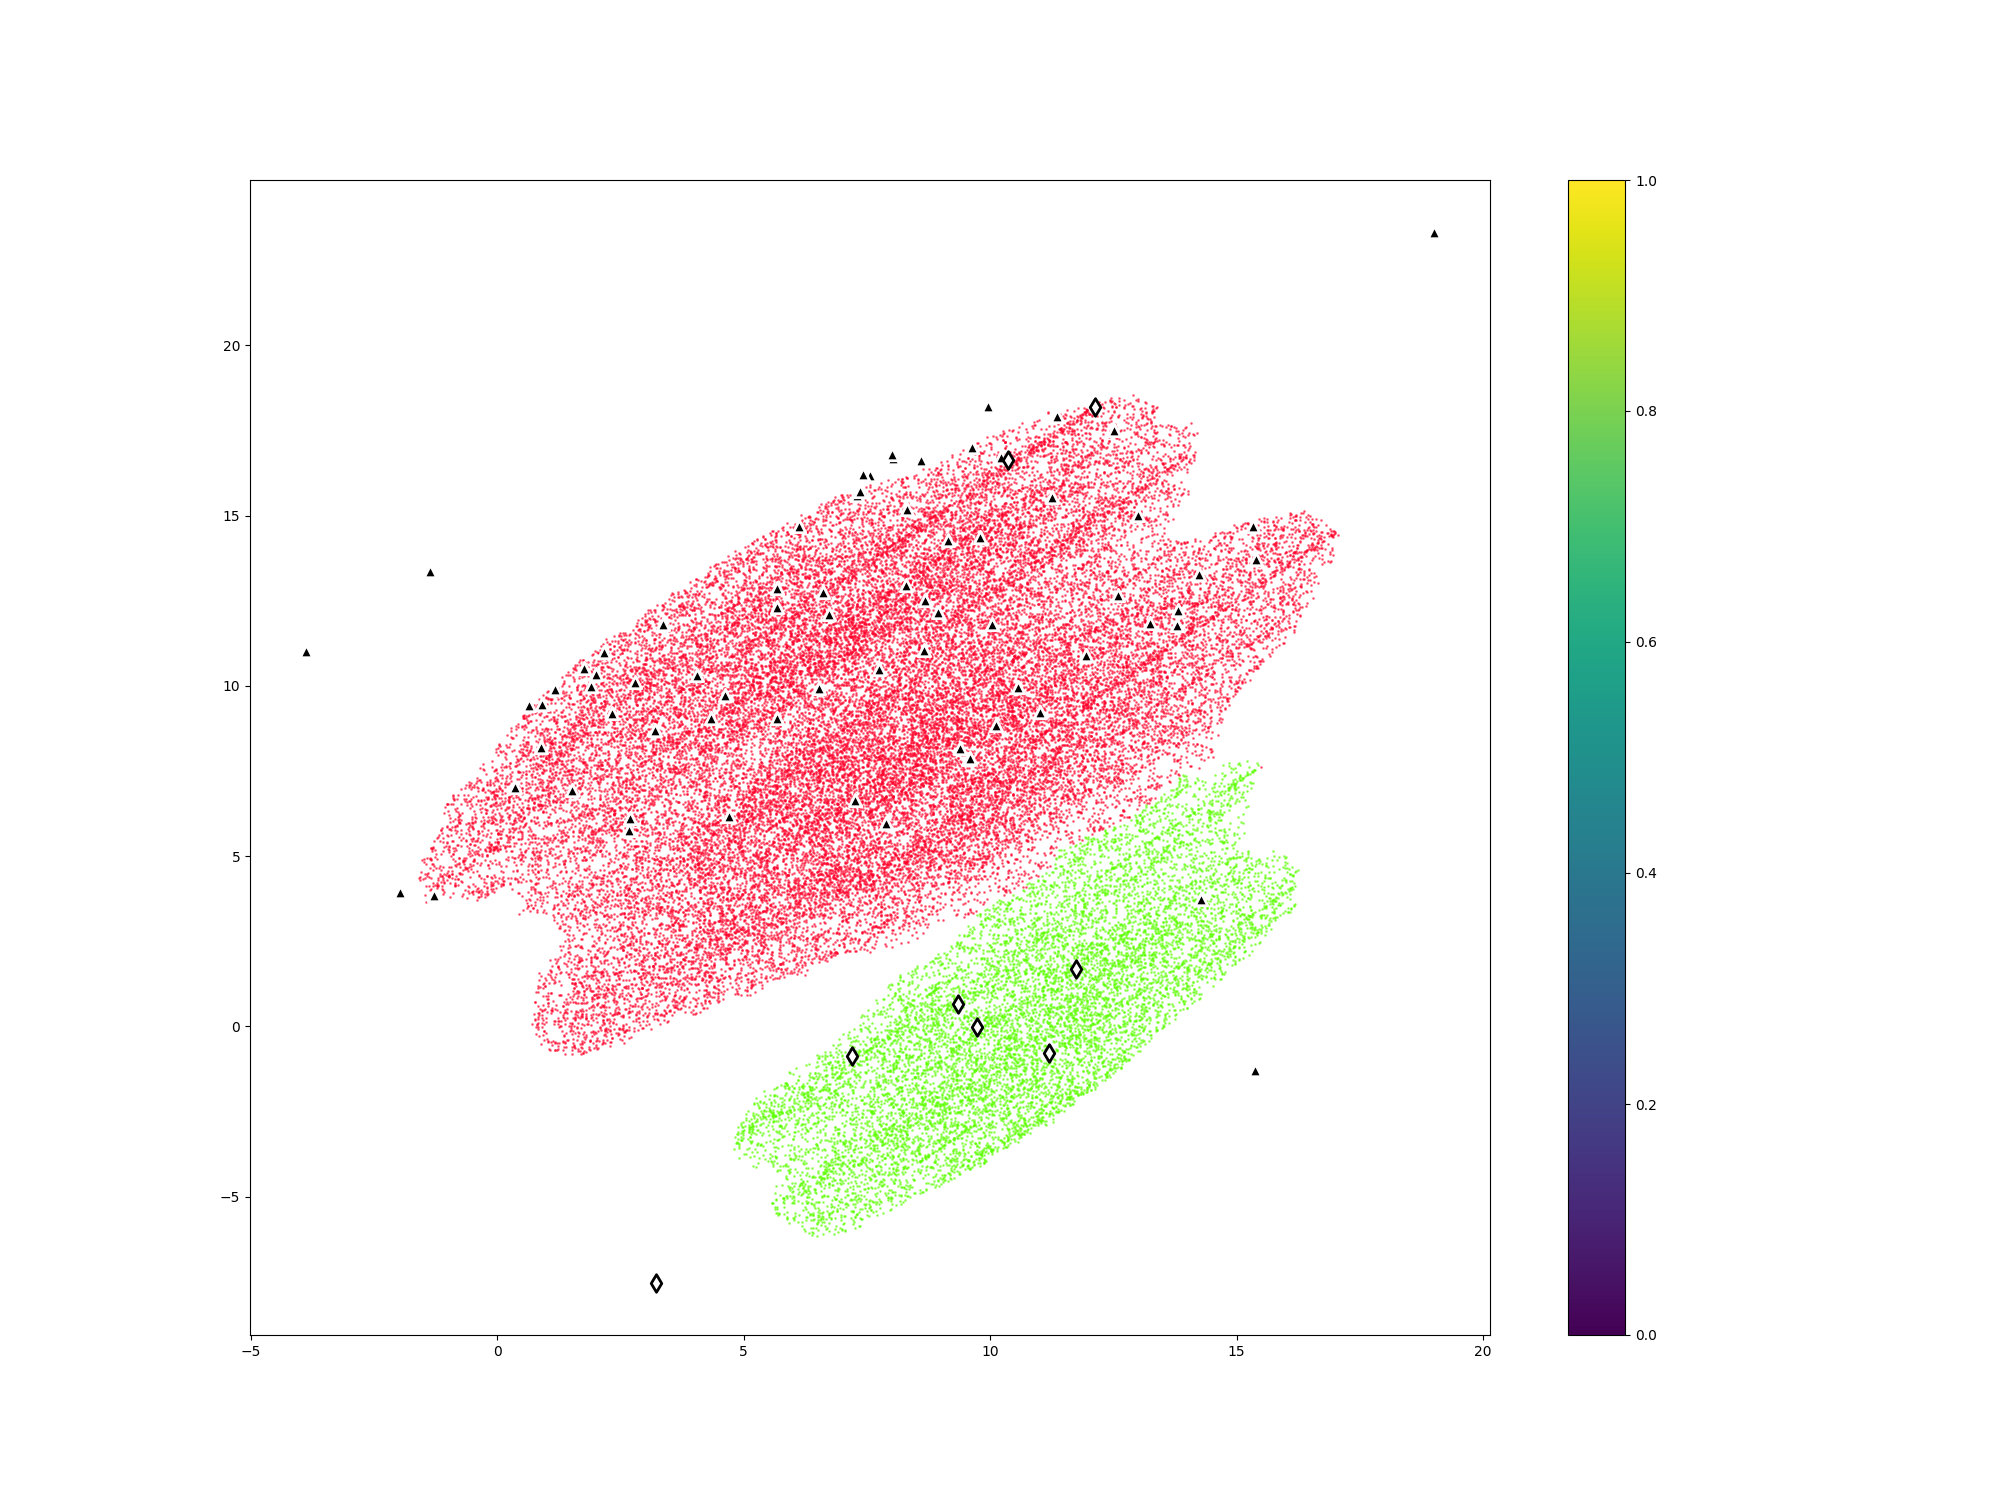

In [69]:
plot_cluster(hdb_model)

In [70]:
res = []
min_cluster_size=170
hdbscan_min_samples=470

testset['clabel']=hdb_model['clabel']
print(len(labels))
print(len(testset))
no_anomalies=len(testset[testset['clabel']==-1])
print(f"found {no_anomalies} anomalies")

stats = {'type': "hdb",
         'testset': t_name,
         'version': version,
        }

detail_stats = {'hdb_minclust': min_cluster_size,
                'hdb_minsamp': hdbscan_min_samples,
                'tdf': f"min_df: {tdidf_min_df}, max_df: {tdidf_max_df}, stopwords: {use_stopwords}, extended stopwords: {use_extended_stopwords}",
                'umap': f"{umap_metric}, ncomp: {umap_ncomponents}, rs: {umap_random_state}, min_dist: {umap_min_dist}, no_neigh: {umap_n_neighbors}",
                'gtr': file_name,
                'gtr_rel': relevance_treshold
               }

my_f_results = pd.merge(identified_repos, testset[["name", "clabel", "topics"]], on="name", how="left")
missing_clabel = len(my_f_results[my_f_results['clabel'].isna()])
print(f"Missing cluster label {missing_clabel}")
my_results = my_f_results[my_f_results['clabel'].notna()]
identified_anom = len(my_results[my_results['clabel']<0])
print(f"Identified anomalies: {identified_anom}")
my_results = my_results[my_results['clabel']>=0]
total_clusters = len(testset[['clabel']].groupby('clabel'))-1

lo_tags = [c for c in identified_repos.columns if 'tag' in c]
for tag in lo_tags:        
    prediction = stats
    prediction['tag'] = tag
    prediction.update(max_fscore(my_results[[tag, 'clabel']].apply(tuple, axis=1).to_dict()))
    prediction.update({'tot_clust': total_clusters, 'tot_anom':no_anomalies, 'no_lab':missing_clabel, 'anom':identified_anom})
    prediction.update(detail_stats)
    res.append(prediction.copy())
display(pd.DataFrame.from_dict(res).sort_values(['f1'], ascending=False))


69026
69026
found 21011 anomalies
Missing cluster label 29
Identified anomalies: 13


type             testset version                tag    tp   tn    fp   fn  \
3  hdb  t1,1.1+1.2+1.3+1.4       3                tag  1781  302   125   70   
1  hdb  t1,1.1+1.2+1.3+1.4       3         tag_kbsoft  1299  160   607  212   
4  hdb  t1,1.1+1.2+1.3+1.4       3  tag_full_cluster5   834  323  1072   49   
2  hdb  t1,1.1+1.2+1.3+1.4       3           tag_nist   742  361  1164   11   
5  hdb  t1,1.1+1.2+1.3+1.4       3  tag_full_cluster6   510  335  1396   37   
6  hdb  t1,1.1+1.2+1.3+1.4       3  tag_full_cluster7   498  334  1408   38   
7  hdb  t1,1.1+1.2+1.3+1.4       3  tag_full_cluster8   331  343  1575   29   
0  hdb  t1,1.1+1.2+1.3+1.4       3           tag_full    16  361  1890   11   

         f1  accuracy  ...  tot_clust  tot_anom  no_lab  anom  hdb_minclust  \
3  0.948097  0.914399  ...          2     21011      29    13           170   
1  0.760316  0.640474  ...          2     21011      29    13           170   
4  0.598064  0.507902  ...          2     21011      29    13           170   
2  0.558105  0.484197  ...          2     21011      29    13           170   
5  0.415817  0.370939  ...          2     21011      29    13           170   
6  0.407862  0.365233  ...          2     21011      29    13           170   
7  0.292145  0.295874  ...          2     21011      29    13           170   
0  0.016555  0.165496  ...          2     21011      29    13           170   

   hdb_minsamp                                                tdf  \
3          470  min_df: 5, max_df: 1.0, stopwords: True, exten...   
1          470  min_df: 5, max_df: 1.0, stopwords: True, exten...   
4          470  min_df: 5, max_df: 1.0, stopwords: True, exten...   
2          470  min_df: 5, max_df: 1.0, stopwords: True, exten...   
5          470  min_df: 5, max_df: 1.0, stopwords: True, exten...   
6          470  min_df: 5, max_df: 1.0, stopwords: True, exten...   
7          470  min_df: 5, max_df: 1.0, stopwords: True, exten...   
0          470  min_df: 5, max_df: 1.0, stopwords: True, exten...   

                                                umap                   gtr  \
3  hellinger, ncomp: 2, rs: 42, min_dist: 0, no_n...  identified_repos4-nf   
1  hellinger, ncomp: 2, rs: 42, min_dist: 0, no_n...  identified_repos4-nf   
4  hellinger, ncomp: 2, rs: 42, min_dist: 0, no_n...  identified_repos4-nf   
2  hellinger, ncomp: 2, rs: 42, min_dist: 0, no_n...  identified_repos4-nf   
5  hellinger, ncomp: 2, rs: 42, min_dist: 0, no_n...  identified_repos4-nf   
6  hellinger, ncomp: 2, rs: 42, min_dist: 0, no_n...  identified_repos4-nf   
7  hellinger, ncomp: 2, rs: 42, min_dist: 0, no_n...  identified_repos4-nf   
0  hellinger, ncomp: 2, rs: 42, min_dist: 0, no_n...  identified_repos4-nf   

   gtr_rel  
3        2  
1        2  
4        2  
2        2  
5        2  
6        2  
7        2  
0        2  

[8 rows x 25 columns]

In [ ]:
embedding

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [459]:
results = from_disk(f'results/hdb_results')

with pd.option_context('display.max_rows', 100, 'display.max_columns', 40):
    display(results.sort_values(['f1'], ascending=False)) #  & !(results['type']=='kmeans')

reading /home/manuel/d3tect-tools/jupyter/testdatav3/results/hdb_results.pkl


type             testset version       tag    tp   tn    fp   fn  \
955   hdb              t2.3.1       3       tag  3507  854     6  193   
1387  hdb  t1,1.1+1.2+1.3+1.4       3       tag  1895  384     0  136   
1267  hdb  t1,1.1+1.2+1.3+1.4       3       tag  1895  384     0  136   
1507  hdb  t1,1.1+1.2+1.3+1.4       3       tag  1895  384     0  136   
1379  hdb  t1,1.1+1.2+1.3+1.4       3       tag  1903  512     0  141   
...   ...                 ...     ...       ...   ...  ...   ...  ...   
768   hdb              t1.3.1       3  tag_full     9  404  1478    0   
1680  hdb  t1,1.1+1.2+1.3+1.4       3  tag_full    11  563  1823   18   
1264  hdb  t1,1.1+1.2+1.3+1.4       3  tag_full    11  508  1884   12   
1504  hdb  t1,1.1+1.2+1.3+1.4       3  tag_full    11  508  1884   12   
1384  hdb  t1,1.1+1.2+1.3+1.4       3  tag_full    11  508  1884   12   

            f1  accuracy       ppv       fpr       tpr       tnr       fnr  \
955   0.972411  0.956360  0.998292  0.006977  0.947838  0.993023  0.052162   
1387  0.965359  0.943685  1.000000       0.0  0.933038       1.0  0.066962   
1267  0.965359  0.943685  1.000000       0.0  0.933038       1.0  0.066962   
1507  0.965359  0.943685  1.000000       0.0  0.933038       1.0  0.066962   
1379  0.964277  0.944836  1.000000       0.0  0.931018       1.0  0.068982   
...        ...       ...       ...       ...       ...       ...       ...   
768   0.012032  0.218403  0.006052  0.785335  1.000000  0.214665  0.000000   
1680  0.011809  0.237681  0.005998   0.76404  0.379310   0.23596  0.620690   
1264  0.011470  0.214907  0.005805  0.787625  0.478261  0.212375  0.521739   
1504  0.011470  0.214907  0.005805  0.787625  0.478261  0.212375  0.521739   
1384  0.011470  0.214907  0.005805  0.787625  0.478261  0.212375  0.521739   

      tot_clust  tot_anom  no_lab  anom  hdb_minclust  hdb_minsamp  \
955           7     19616       7     7           260          470   
1387         21     13725      29    11           380          290   
1267         21     13725      29    11           350          290   
1507         21     13725      29    11           410          290   
1379         19     11020      29     9           380          260   
...         ...       ...     ...   ...           ...          ...   
768          53     21393      29    19           230          230   
1680         23      9171      29    11           470           50   
1264         21     13725      29    11           350          290   
1504         21     13725      29    11           410          290   
1384         21     13725      29    11           380          290   

                                                    tdf  \
955   min_df: 4, max_df: 1.0, stopwords: True, exten...   
1387  min_df: 5, max_df: 1.0, stopwords: False, exte...   
1267  min_df: 5, max_df: 1.0, stopwords: False, exte...   
1507  min_df: 5, max_df: 1.0, stopwords: False, exte...   
1379  min_df: 5, max_df: 1.0, stopwords: False, exte...   
...                                                 ...   
768   min_df: 5, max_df: 1.0, stopwords: True, exten...   
1680  min_df: 5, max_df: 1.0, stopwords: False, exte...   
1264  min_df: 5, max_df: 1.0, stopwords: False, exte...   
1504  min_df: 5, max_df: 1.0, stopwords: False, exte...   
1384  min_df: 5, max_df: 1.0, stopwords: False, exte...   

                                                   umap                   gtr  \
955   hellinger, ncomp: 2, rs: 42, min_dist: 0, no_n...  identified_repos4-nf   
1387  hellinger, ncomp: 2, rs: 42, min_dist: 0.0, no...  identified_repos4-nf   
1267  hellinger, ncomp: 2, rs: 42, min_dist: 0.0, no...  identified_repos4-nf   
1507  hellinger, ncomp: 2, rs: 42, min_dist: 0.0, no...  identified_repos4-nf   
1379  hellinger, ncomp: 2, rs: 42, min_dist: 0.0, no...  identified_repos4-nf   
...                                                 ...                   ...   
768   hellinger, ncomp: 2, rs: 42, min_dist: 0.0, no...  identified_repos4

In [632]:
t_set_loader('D_C3')

reading /home/manuel/d3tect-tools/jupyter/testdatav3/../testdatav3/t2.4.1s.pkl
t2.4.1s+2.4.2+2.4.4+2.4.6+2.4.3
reading /home/manuel/d3tect-tools/jupyter/testdatav3/t2.4.2.pkl
reading /home/manuel/d3tect-tools/jupyter/testdatav3/t2.4.4.pkl
reading /home/manuel/d3tect-tools/jupyter/testdatav3/t2.4.6.pkl
reading /home/manuel/d3tect-tools/jupyter/testdatav3/t2.4.3.pkl


name  \
0                                    google/chaps-linux   
1                   Azure/ai-solution-accelerators-list   
2                                       cbucher/console   
3                                      intel/ipp-crypto   
4                         WILL-Hunting/FakeXiecheng.API   
...                                                 ...   
8963  exoplanet-imaging-challenge/exoplanet-imaging-...   
8964                         samuel-code/face-detection   
8965                              ApiO/jquery.triSwitch   
8966                    mohammaduzair9/Face-Recognition   
8967          microsoft/security-devops-actions-toolkit   

                                                 topics  
0     [md, man, patch, implementation, google, makef...  
1     [solution, azure, support, list, md, security,...  
2     [terminal, github, 7, console, l10n, experienc...  
3     [clang, md, tools, programs, security, crypto,...  
4      [net, md, hunting, api, test, txt, core, readme]  
...                                                 ...  
8963  [near, github, test, xml, feed, high, image, c...  
8964  [eclipse, detecting, code, detection, detect, ...  
8965  [md, json, html, simple, index, checkbox, lice...  
8966  [detection, tensorflowserving, web, video, md,...  
8967  [action, toolkit, package, github, microsoft, ...  

[8968 rows x 2 columns]

In [672]:
#results = from_disk(f'results/autorun1/hdb_results')
results = from_disk(f'results/autorun1/hdb_results')

print(results[['testset']].groupby('testset').size())

with pd.option_context('display.max_rows', 100, 'display.max_columns', 40, 'display.max_colwidth', 0):
    display(results[(results['tnr']>0.1) &  (results['testset']==t_set['D_C2']) & (results['tag']=='tag') ].sort_values(['f1','tot_clust'], ascending=False)) # & (results['testset']=='t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3') 

reading /home/manuel/d3tect-tools/jupyter/testdatav3/results/autorun1/hdb_results.pkl
testset
t1                                 4050
t1.1                               2025
t1.2                               2025
t1.3                               2025
t1.3.1                             2025
t1.4                               2025
t2.3.1s                            2025
t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3    2025
t2.4.1s+2.4.2+2.4.4+2.4.6+2.4.3    2025
t2.5.1s+2.5.2+2.5.4+2.5.6+2.5.3    2025
dtype: int64


type                          testset version  tag    tp   tn   fp    fn  \
93    hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  4880  792  198  16     
228   hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  4880  792  198  16     
363   hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  4880  792  198  16     
498   hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  4880  792  198  16     
633   hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  4880  792  198  16     
768   hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  4880  792  198  16     
903   hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  4880  792  198  16     
1038  hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  4880  792  198  16     
1173  hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  4880  792  198  16     
1308  hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  4880  792  198  16     
1443  hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  4880  792  198  16     
1578  hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  4880  792  198  16     
1713  hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  4880  792  198  16     
1848  hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  4880  792  198  16     
1983  hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  4859  594  198  20     
1002  hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  4006  100  890  890    
1137  hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  4006  100  890  890    
1272  hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  4006  100  890  890    
1407  hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  4006  100  890  890    
1542  hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  4006  100  890  890    
1677  hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  4006  100  890  890    
1812  hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  4006  100  890  890    
1947  hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  4006  100  890  890    
1524  hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  1073  682  11   1889   
1659  hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  1073  682  11   1889   
291   hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  457   364  0    890    
39    hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  625   628  11   1896   
174   hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  625   628  11   1896   
309   hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  625   628  11   1896   
444   hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  625   628  11   1896   
579   hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  625   628  11   1896   
714   hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  625   628  11   1896   
849   hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  625   628  11   1896   
984   hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  625   628  11   1896   
1119  hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  625   628  11   1896   
1254  hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  625   628  11   1896   
1389  hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  625   628  11   1896   
147   hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  173   266  0    551    
12    hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  170   190  0    543    
282   hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  179   273  0    583    
21    hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  140   210  0    470    
156   hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  140   216  0    505    
408   hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  197   211  9    759    
165   hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  74    168  0    319    
300   hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  74    168  0    319    
435   hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  74    168  0    319    
273   hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  197   226  9    894    
30    hdb  t2.3.1s+2.3.2+2.3.4+2.3.6+2.3.3  3       tag  71    174  0    350    
138   hdb  t2.3.1s+2.3.2+2.3.4+2.3.6

In [727]:
#results = from_disk(f'results/autorun1/hdb_results')
results = from_disk(f'results/autorun1/kmeans_results')
#results = from_disk(f'results/autorun1/hdb_results')


reading /home/manuel/d3tect-tools/jupyter/testdatav3/results/autorun1/kmeans_results.pkl


In [764]:
results[(results['type']=='kmeans-umapt')]

type                          testset version  size  no_con  \
0    kmeans-umapt                               t1       3  10.0  2968.0   
1    kmeans-umapt                               t1       3  10.0  2968.0   
2    kmeans-umapt                               t1       3  10.0  2968.0   
3    kmeans-umapt                               t1       3  10.0  2968.0   
4    kmeans-umapt                               t1       3  10.0  2968.0   
..            ...                              ...     ...   ...     ...   
148  kmeans-umapt  t2.4.1s+2.4.2+2.4.4+2.4.6+2.4.3       3  58.0     8.0   
149  kmeans-umapt  t2.4.1s+2.4.2+2.4.4+2.4.6+2.4.3       3  58.0     8.0   
150  kmeans-umapt  t2.4.1s+2.4.2+2.4.4+2.4.6+2.4.3       3  58.0     8.0   
151  kmeans-umapt  t2.4.1s+2.4.2+2.4.4+2.4.6+2.4.3       3  58.0     8.0   
152  kmeans-umapt  t2.4.1s+2.4.2+2.4.4+2.4.6+2.4.3       3  58.0     8.0   

                    tag    tp    tn    fp    fn  ...  tot_clust  no_lab  \
0              tag_full    23  1661  1873    13  ...         10      25   
1            tag_kbsoft  1415   767   481   907  ...         10      25   
2              tag_nist   805  1219  1091   455  ...         10      25   
3                   tag  1888   608     8  1066  ...         10      25   
4     tag_full_cluster8   520  1367  1376   307  ...         10      25   
..                  ...   ...   ...   ...   ...  ...        ...     ...   
148   tag_full_cluster8   115  4391   361  1128  ...         58       0   
149   tag_full_cluster9    77  4843   399   676  ...         58       0   
150  tag_full_cluster10    88  4849   388   670  ...         58       0   
151  tag_full_cluster11    68  5041   408   478  ...         58       0   
152  tag_full_cluster12    58  5083   418   436  ...         58       0   

                                                   tdf                   gtr  \
0    min_df: 4, max_df: 1.0, stopwords: True, exten...  identified_repos4-nf   
1    min_df: 4, max_df: 1.0, stopwords: True, exten...  identified_repos4-nf   
2    min_df: 4, max_df: 1.0, stopwords: True, exten...  identified_repos4-nf   
3    min_df: 4, max_df: 1.0, stopwords: True, exten...  identified_repos4-nf   
4    min_df: 4, max_df: 1.0, stopwords: True, exten...  identified_repos4-nf   
..                                                 ...                   ...   
148  min_df: 4, max_df: 1.0, stopwords: True, exten...  identified_repos4-nf   
149  min_df: 4, max_df: 1.0, stopwords: True, exten...  identified_repos4-nf   
150  min_df: 4, max_df: 1.0, stopwords: True, exten...  identified_repos4-nf   
151  min_df: 4, max_df: 1.0, stopwords: True, exten...  identified_repos4-nf   
152  min_df: 4, max_df: 1.0, stopwords: True, exten...  identified_repos4-nf   

     gtr_rel                                               umap  tot_anom  \
0          2  (hellinger, ncomp: 2, rs: 42, min_dist: 0, no_...       NaN   
1          2  (hellinger, ncomp: 2, rs: 42, min_dist: 0, no_...       NaN   
2          2  (hellinger, ncomp: 2, rs: 42, min_dist: 0, no_...       NaN   
3          2  (hellinger, ncomp: 2, rs: 42, min_dist: 0, no_...       NaN   
4          2  (hellinger, ncomp: 2, rs: 42, min_dist: 0, no_...       NaN   
..       ...                                                ...       ...   
148        2  (hellinger, ncomp: 2, rs: 42, min_dist: 0, no_...       NaN   
149        2  (hellinger, ncomp: 2, rs: 42, min_dist: 0, no_...       NaN   
150        2  (hellinger, ncomp: 2, rs: 42, min_dist: 0, no_...       NaN   
151        2  (hellinger, ncomp: 2, rs: 42, min_dist: 0, no_...       NaN   
152        2  (hellinger, ncomp: 2, rs: 42, min_dist: 0, no_...       NaN   

     anom  hdb_minclust hdb_minsamp  
0     NaN           NaN         NaN  
1     NaN           NaN         NaN  
2     NaN           NaN         NaN  
3     NaN           NaN         NaN  
4     NaN           NaN         NaN  
..    ...           ...         ...  
148   NaN           NaN         NaN  
149   NaN

In [773]:
#kmeans-umapt
#kmeans
my_latex_result = pd.DataFrame()
datasets = list(t_set.keys())[::-1]
results = from_disk(f'results/autorun1/hdb_results')
for i in datasets:
    my_res_line = results[(results['type']=='hdb') &(results['tot_clust']>2) &(results['tnr']>0.1) &  (results['testset']==t_set[i]) & (results['tag']=='tag') ].sort_values(['f1','tot_clust'], ascending=False).head(1)
    my_res_line['Algorithm'] = "UMAP + HDBSCAN"
    my_res_line['Dataset'] = i
    #my_res_line['Anomalies/Disconnections'] = f"{my_res_line['tot_anom'].iat[0]} ({my_res_line['anom']})"
    my_res_line = my_res_line[['Algorithm', 'Dataset', 'f1', 'ppv', 'tpr', 'tot_clust', 'no_lab', 'tot_anom', 'anom']]
    my_latex_result = pd.concat([my_res_line,my_latex_result.loc[:]]).reset_index(drop=True)
results = from_disk(f'results/autorun1/kmeans_results')
for i in datasets:
    my_res_line = results[(results['type']=='kmeans-umapt') &(results['tn']>0) &  (results['testset']==t_set[i]) & (results['tag']=='tag') ].sort_values(['f1','tot_clust'], ascending=False).head(1)
    my_res_line['Algorithm'] = "UMAP + K-Means"
    my_res_line['Dataset'] = i
    my_res_line['tot_anom'] = my_res_line['no_con']
    #my_res_line['Anomalies/Disconnections'] = f"{my_res_line['tot_anom'].iat[0]} ({my_res_line['anom']})"
    my_res_line = my_res_line[['Algorithm', 'Dataset', 'f1', 'ppv', 'tpr', 'tot_clust', 'no_lab', 'tot_anom', 'anom']]
    my_latex_result = pd.concat([my_res_line,my_latex_result.loc[:]]).reset_index(drop=True)

for i in datasets:
    my_res_line = results[(results['type']=='kmeans') &(results['tnr']>0.1) &  (results['testset']==t_set[i]) & (results['tag']=='tag') ].sort_values(['f1','tot_clust'], ascending=False).head(1)
    my_res_line['Algorithm'] = "K-Means"
    my_res_line['Dataset'] = i
    #my_res_line['Anomalies/Disconnections'] = f"{my_res_line['tot_anom'].iat[0]} ({my_res_line['anom']})"
    my_res_line = my_res_line[['Algorithm', 'Dataset', 'f1', 'ppv', 'tpr', 'tot_clust', 'no_lab', 'tot_anom', 'anom']]
    my_latex_result = pd.concat([my_res_line,my_latex_result.loc[:]]).reset_index(drop=True)

my_latex_result = my_latex_result.rename(columns={"f1": "F1", "ppv": "PPV", "ppv": "PPV", "tpr": "TPR", "tot_clust": "Clusters", "no_lab": "Not labeled", "tot_anom": "T A.", "anom": "A."})

print(my_latex_result)


reading /home/manuel/d3tect-tools/jupyter/testdatav3/results/autorun1/hdb_results.pkl
reading /home/manuel/d3tect-tools/jupyter/testdatav3/results/autorun1/kmeans_results.pkl
         Algorithm Dataset        F1       PPV       TPR  Clusters  \
0          K-Means    D_T1  0.501486  0.924179  0.344103        19   
1          K-Means    D_T2  0.661522  0.986932  0.497491        13   
2          K-Means    D_T3  0.682145  0.988684  0.520703        10   
3          K-Means    D_T4  0.593275  0.935179  0.434442        10   
4          K-Means    D_T5  0.690661  0.909324  0.556775        16   
5          K-Means    D_T6  0.540866  0.938760  0.379862        13   
6          K-Means    D_C1  0.557512  0.958964  0.392993        10   
7          K-Means    D_C2  0.601723  0.983644  0.433433        10   
8          K-Means    D_C3  0.634826  0.979132  0.469670         7   
9   UMAP + K-Means    D_T1  0.808336  0.993596  0.681305        10   
10  UMAP + K-Means    D_T2  0.840696  1.000000  0.72517

In [774]:
print(my_latex_result.to_latex(index=False, #.sort_values(['Dataset', 'Algorithm'],ascending=True)
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,
))

\begin{tabular}{llrrrrrrr}
\toprule
     Algorithm & Dataset &   F1 &  PPV &  TPR &  Clusters &  Not labeled &     T A. &    A. \\
\midrule
       K-Means &    D\_T1 & 0.50 & 0.92 & 0.34 &        19 &           22 &      NaN &   NaN \\
       K-Means &    D\_T2 & 0.66 & 0.99 & 0.50 &        13 &           22 &      NaN &   NaN \\
       K-Means &    D\_T3 & 0.68 & 0.99 & 0.52 &        10 &           22 &      NaN &   NaN \\
       K-Means &    D\_T4 & 0.59 & 0.94 & 0.43 &        10 &           22 &      NaN &   NaN \\
       K-Means &    D\_T5 & 0.69 & 0.91 & 0.56 &        16 &           22 &      NaN &   NaN \\
       K-Means &    D\_T6 & 0.54 & 0.94 & 0.38 &        13 &           22 &      NaN &   NaN \\
       K-Means &    D\_C1 & 0.56 & 0.96 & 0.39 &        10 &            0 &      NaN &   NaN \\
       K-Means &    D\_C2 & 0.60 & 0.98 & 0.43 &        10 &            0 &      NaN &   NaN \\
       K-Means &    D\_C3 & 0.63 & 0.98 & 0.47 &         7 &            0 &      NaN &   NaN

/tmp/ipykernel_3415640/1469324364.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(my_latex_result.to_latex(index=False, #.sort_values(['Dataset', 'Algorithm'],ascending=True)


In [87]:
from_disk(f'results/autorun1/umap_clusterable_embedding_t1.2')

reading /home/manuel/d3tect-tools/jupyter/testdatav3/results/autorun1/umap_clusterable_embedding_t1.2.pkl


x         y                                    name
0     -3.657144  2.325754          thingsym/multi-device-switcher
1      4.054002 -2.964379  redlink-gmbh/solr-compound-word-filter
2     -2.723526  1.123009    xswlme/Delivery-Availability-Checker
3     -0.079550 -1.879494                eastsss/ErrorDispatching
4      3.193387 -7.740618                   ahmadhuzaifa/skinskan
...         ...       ...                                     ...
69021  6.325533  1.187295                   waqasbhatti/astrobase
69022  0.188097  0.626908                 hpcc-systems/vscode-ecl
69023  3.671337  2.062382                   MarcoPon/BlockHashLoc
69024  4.913236  3.057897           bhagatabhijeet/bhagatabhijeet
69025 -1.212021  4.411232           LandGrey/SpringBootVulExploit

[69026 rows x 3 columns]

In [353]:
plot_emb = from_disk(f'results/pythonautorun1/umap_embedding_t2.4.1s+2.4.2+2.4.4+2.4.6+2.4.3')
#plot_emb = from_disk(f'results/autorun1/umap_embedding_t1.2')
#plot_emb['clabel'] = from_disk(f'results/autorun1/hdb_labels_results_t1.1')['ss170cs440']
#plot_emb['clabel'] = from_disk(f'results/autorun1/hdb_labels_results_t1.1')['ss290cs80']
plot_emb['clabel'] = from_disk(f'results/autorun1/hdb_labels_results_t1.4')['ss50cs410']

#print(f'dropping {len(plot_emb[plot_emb["x"].isnull()])} vertices')
#plot_emb = plot_emb[plot_emb['x'].notnull()]
#plot_emb['clabel'] = cluster.KMeans(n_clusters=22, random_state=42).fit(plot_emb[['x', 'y']].to_numpy()).labels_

print(plot_emb[['clabel']].groupby('clabel').size())

plot_cluster(plot_emb, plot_anom=False,size=(7,7))

reading /home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/pythonautorun1/umap_embedding_t2.4.1s+2.4.2+2.4.4+2.4.6+2.4.3.pkl


FileNotFoundError: [Errno 2] No such file or directory: '/home/manuel/d3tect-tools/Notebooks/raw_testdata_v1/results/pythonautorun1/umap_embedding_t2.4.1s+2.4.2+2.4.4+2.4.6+2.4.3.pkl'

In [366]:
ttestset = from_disk(f'../testdatav2/t2.4.1s')

reading /home/manuel/d3tect-tools/jupyter/testdatav3/../testdatav2/t2.4.1s.pkl


In [302]:
ttestset[ttestset['name']=='OISF/suricata']['topics'].item()

'detect test workflow setup patch traffic id socket free pcap log live confirm unix build ip tool feedback process network scan checker suricata github qa review document code go http input bug attack nsm data os'

In [382]:
ttestset = from_disk(f'../testdatav2/t2.4.1s')

reading /home/manuel/d3tect-tools/jupyter/testdatav3/../testdatav2/t2.4.1s.pkl


In [383]:
ttestset[ttestset['name']=='OISF/suricata']['topics'].item()

'detect test workflow setup patch traffic id socket free pcap log live confirm unix build ip tool feedback process network scan checker suricata github qa review document code go http input bug attack nsm data os'

In [517]:
t_name = t_set['D_T6']
from collections import Counter
len(Counter(from_disk(f'../testdatav{testav}/{t_name}')['topics'].apply(lambda x: x.split()).explode()))

reading /home/manuel/d3tect-tools/jupyter/testdatav3/../testdatav3/t1.4.pkl


1547

In [435]:
merge_list = ["t2.4.2", "t2.4.4", "t2.4.6", "t2.4.3"]
testav=3
t_name = "t2.4.1s"

testset = from_disk(f'../testdatav{testav}/{t_name}')
t_name = f'{t_name}+{"+".join([re.sub(r"t", "", tid) for tid in merge_list])}'
print(t_name)
testset_merge = create_merge(merge_to_one=True)
#init_short = from_disk('init_short')
testset = pd.merge(testset, init_short, on="name", how="left")

reading /home/manuel/d3tect-tools/jupyter/testdatav3/../testdatav3/t2.4.1s.pkl
t2.4.1s+2.4.2+2.4.4+2.4.6+2.4.3
reading /home/manuel/d3tect-tools/jupyter/testdatav3/t2.4.2.pkl
reading /home/manuel/d3tect-tools/jupyter/testdatav3/t2.4.4.pkl
reading /home/manuel/d3tect-tools/jupyter/testdatav3/t2.4.6.pkl
reading /home/manuel/d3tect-tools/jupyter/testdatav3/t2.4.3.pkl
reading /home/manuel/d3tect-tools/jupyter/testdatav3/init_short.pkl


In [421]:
testset[testset['name']=='OISF/suricata']['topics'].item()

['checker',
 'data',
 'offline',
 'socket',
 'traffic',
 'service',
 'unix',
 'http',
 'workflow',
 'compiler',
 'performance',
 'input',
 'optimization',
 'scan',
 'course',
 'feedback',
 'code',
 'engine',
 'community',
 'regression',
 'setup',
 'analysis',
 'live',
 'software',
 'detection',
 'nsm',
 'tool',
 'process',
 'collection',
 'github',
 'program',
 'automation',
 'pcap',
 'ids',
 'free',
 'go',
 'log',
 'request',
 'evaluation',
 'bug',
 'network',
 'build',
 'confirm',
 'suricata',
 'opensource',
 'ips',
 'test',
 'review',
 'validation',
 'quality',
 'patch',
 'os',
 'document',
 'qa',
 'security',
 'guide']

In [438]:
testset['topics'] = testset['topics'].apply(lambda x: x.split())

In [642]:
testset = t_set_loader('D_C3')

reading /home/manuel/d3tect-tools/jupyter/testdatav3/../testdatav3/t2.4.1s.pkl
t2.4.1s+2.4.2+2.4.4+2.4.6+2.4.3
reading /home/manuel/d3tect-tools/jupyter/testdatav3/t2.4.2.pkl
reading /home/manuel/d3tect-tools/jupyter/testdatav3/t2.4.4.pkl
reading /home/manuel/d3tect-tools/jupyter/testdatav3/t2.4.6.pkl
reading /home/manuel/d3tect-tools/jupyter/testdatav3/t2.4.3.pkl


In [646]:
t_name

't2.4.1s+2.4.2+2.4.4+2.4.6+2.4.3'

In [644]:
testset[testset['name']=='snort3/snort3']['topics'].to_list()

[['r',
  'github',
  'parser',
  'test',
  'network',
  'component',
  'code',
  'http',
  'script',
  'tool',
  'shell',
  'detection',
  'package',
  'management',
  'log',
  'go',
  'ids',
  'project',
  'compiler',
  'git',
  'c',
  'list',
  'documentation',
  'hardware',
  'ips',
  'lua',
  'javascript',
  'cmake',
  'windows',
  'data',
  'ssl',
  'guide',
  'components',
  'pdf',
  'xcode',
  'free',
  'html',
  'proxy',
  'pcap',
  'demo']]

In [645]:
get_similarity(testset, 'snort3/snort3', "pwndizzle/CodeExecutionOnWindows")

{'test', 'network', 'http', 'code', 'script', 'tool', 'shell', 'detection', 'package', 'management', 'log', 'go', 'compiler', 'c', 'list', 'javascript', 'windows', 'components', 'html'}
{'r', 'github', 'microsoft', 'framework', 'parser', 'component', 'console', 'commandline', 'powershell', 'example', 'admin', 'node', 'ids', 'project', 'git', 'documentation', 'hardware', 'ips', 'server', 'lua', 'cmake', 'bypass', 'data', 'ssl', 'guide', 'pdf', 'xcode', 'free', 'alert', 'proxy', 'pcap', 'demo'}
0.37254901960784315


In [ ]:
#print_similar_repos_jaccard("zeek/zeek", snort_subset[(snort_subset['commits'] > 1) &(snort_subset['archived'] == False) &(snort_subset['isfork'] == False) & (snort_subset['stars'] >100)], top_n=30)

In [457]:
pr_similar_from_subset(testset[(testset['commits'] > 1) &(testset['archived'] == False) &(testset['isfork'] == False) & (testset['stars'] >1)], 'snort3/snort3', top=30, cut_off=10000) #cutoff = number of repos the keyword can be used

snort3/snort3 1.0
da667/Autosnort3 0.39344262295081966
snort3/snort3_extra 0.375
pwndizzle/CodeExecutionOnWindows 0.37254901960784315
hazelcast/hazelcast-go-client 0.3620689655172414
lgblgblgb/xemu 0.3548387096774194
opencomputeproject/OSF-Aptio-OpenEdition 0.35
cjacker/opensource-toolchain-8051 0.3484848484848485
SpiderLabs/ModSecurity 0.3484848484848485
agroce/tstl 0.3472222222222222
F-i-f/tdiff 0.34615384615384615
jive-vlbi/jive5ab 0.34615384615384615
fkie-cad/pcapFS 0.34545454545454546
AEFeinstein/Super-2023-Swadge-FW 0.3424657534246575
pblischak/HyDe 0.34
ipsecdiagtool/ipsecdiagtool 0.33962264150943394
beaumontlab/antonie 0.3392857142857143
Benoit37000/proxmark3-iceman 0.3392857142857143
wrayjustin/yaids 0.3389830508474576
vinipsmaker/tufao 0.3389830508474576
nektro/pcre-8.45 0.3387096774193548
svn2github/pcre 0.3387096774193548
zeromq/zyre 0.3333333333333333
enkomio/AlanFramework 0.3333333333333333
SylvainDe/DidYouMean-Python 0.3333333333333333
lexus2k/tinyslip 0.3333333333333333

In [454]:
len(testset['topics'])

216069

In [564]:
ttestset= t_set_loader('D_C3')

reading /home/manuel/d3tect-tools/jupyter/testdatav3/../testdatav3/t2.4.1s.pkl
t2.4.1s+2.4.2+2.4.4+2.4.6+2.4.3
reading /home/manuel/d3tect-tools/jupyter/testdatav3/t2.4.2.pkl
reading /home/manuel/d3tect-tools/jupyter/testdatav3/t2.4.4.pkl
reading /home/manuel/d3tect-tools/jupyter/testdatav3/t2.4.6.pkl
reading /home/manuel/d3tect-tools/jupyter/testdatav3/t2.4.3.pkl


In [565]:
len(ttestset)

216069

In [566]:
len(ttestset[ttestset['topics'].str.len() > 0])

216069

In [578]:
ttestset.explode(['topics']).groupby('topics').size()

In [394]:
ttestset[ttestset['name']=="snort3/snort3"]['topics'].to_list()

[['components',
  'component',
  'hardware',
  'package',
  'code',
  'html',
  'http',
  'c',
  'script',
  'project',
  'parser',
  'ips',
  'network',
  'proxy',
  'detection',
  'log',
  'list',
  'tool',
  'free',
  'documentation',
  'cmake',
  'compiler',
  'management',
  'demo',
  'guide',
  'git',
  'ssl',
  'github',
  'shell',
  'javascript',
  'r',
  'data',
  'pcap',
  'test',
  'xcode',
  'lua',
  'windows',
  'pdf',
  'ids',
  'go']]